In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project3_clustering_cardiac_arrest")

In [2]:
pwd

'C:\\Users\\JAYANT\\Desktop\\python_240624\\Finger_tips_project\\Project3_clustering_cardiac_arrest'

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv(r"ML Project - Clustering Cardiac Arrest U16955461930.csv")
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [6]:
pd.set_option("display.float_format",lambda x: "% .3f"%x)
data.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000,889.000
mean,1.259,0.120,0.838,0.087,0.919,0.055,0.043,0.082,0.926,0.018,0.021,0.033
std,0.501,0.326,0.369,0.281,0.273,0.228,0.202,0.275,0.262,0.133,0.145,0.178
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
50%,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
75%,2.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
max,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [7]:
data.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [8]:
## here Id is not provided so we can not consider below data as duplicate
data[data.duplicated()]

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
7,2,0,1,0,1,0,0,0,1,0,0,0,no
8,1,0,1,0,1,0,0,0,1,0,0,0,no
9,1,0,1,0,0,0,0,1,1,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,0,1,0,1,0,0,0,1,0,0,0,no
885,1,0,1,0,1,0,0,0,1,0,0,0,no
886,1,0,0,1,1,0,0,0,1,0,0,0,yes
887,2,0,1,0,0,0,0,1,1,0,0,0,no


In [9]:
data["UnderRisk"].value_counts()

UnderRisk
no     699
yes    190
Name: count, dtype: int64

In [10]:
data["UnderRisk"].unique()

array(['no', 'yes'], dtype=object)

In [12]:
data["UnderRisk"]=data["UnderRisk"].replace(['no', 'yes'],[0,1])

data=data.drop("UnderRisk",axis=1)

In [13]:
from sklearn.cluster import KMeans

In [14]:
model=KMeans(n_clusters=2)
data["clusters"]=model.fit_predict(data)

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(data,data["clusters"])

0.4178921169709526

In [16]:
model.cluster_centers_

array([[2.00000000e+00, 6.25000000e-02, 9.06250000e-01, 6.25000000e-02,
        9.29687500e-01, 2.73437500e-02, 1.95312500e-02, 7.42187500e-02,
        9.41406250e-01, 1.04083409e-17, 7.81250000e-03, 3.90625000e-02,
        1.56250000e-01],
       [9.58925750e-01, 1.43759874e-01, 8.10426540e-01, 9.63665087e-02,
        9.14691943e-01, 6.63507109e-02, 5.21327014e-02, 8.53080569e-02,
        9.19431280e-01, 2.52764613e-02, 2.68562401e-02, 3.00157978e-02,
        2.36966825e-01]])

In [19]:
result={"n_cluster":[],
    "s_score":[]}
for i in range(2,21):
    model=KMeans(n_clusters=i)
    result["n_cluster"].append(i)
    data["clusters"]=model.fit_predict(data)
    result["s_score"].append(silhouette_score(data,data["clusters"]))
result=pd.DataFrame(result)
result

,n_cluster,s_score
0,2,0.383
1,3,0.455
2,4,0.510
3,5,0.585
4,6,0.603
5,7,0.670
6,8,0.669
7,9,0.690
8,10,0.704
9,11,0.713


s_score

In [20]:
wcss=[]

for i in range(2,21):
    model=KMeans(n_clusters=i,random_state=42)
    data["clusters"]=model.fit_predict(data)
    wcss.append(model.inertia_)

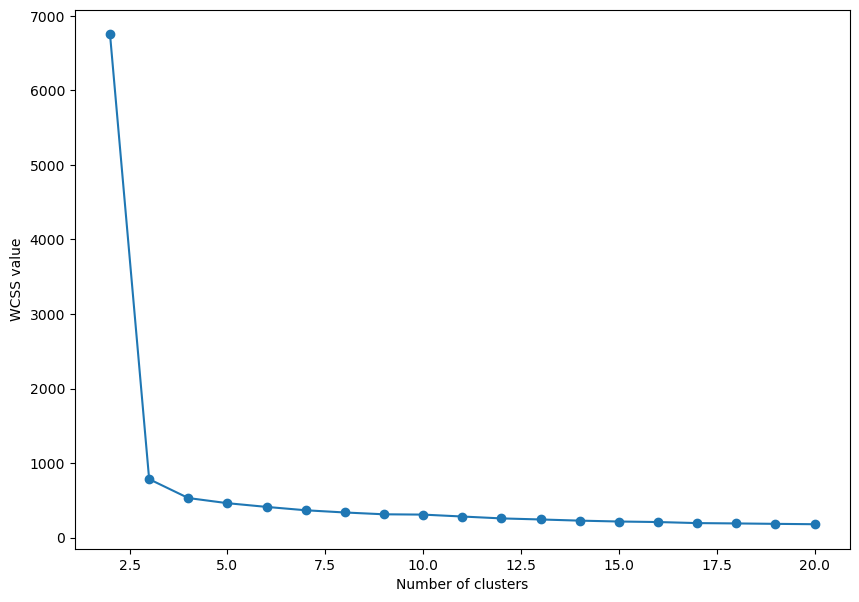

In [21]:
plt.figure(figsize=(10,7))
plt.plot(range(2,21),wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show()

In [22]:
for idx,score in enumerate(wcss,start=2):
    print(f"WCSS score for {idx} is {score}")
    


WCSS score for 2 is 6754.037469509787
WCSS score for 3 is 783.8383193519188
WCSS score for 4 is 530.389825830463
WCSS score for 5 is 461.27662614396536
WCSS score for 6 is 411.3549616223009
WCSS score for 7 is 366.21574005141855
WCSS score for 8 is 336.49655237634835
WCSS score for 9 is 312.11568549210415
WCSS score for 10 is 308.05845178781163
WCSS score for 11 is 282.3779149103886
WCSS score for 12 is 257.0191112947802
WCSS score for 13 is 242.83149600841563
WCSS score for 14 is 227.08817224316994
WCSS score for 15 is 215.28281719868448
WCSS score for 16 is 208.3010693850553
WCSS score for 17 is 194.15082428701564
WCSS score for 18 is 189.55292955017353
WCSS score for 19 is 183.92820887978246
WCSS score for 20 is 178.96409226087212


In [23]:
## from above graph of wcss value, 3 is break point and is most suitable for optimum result
model=KMeans(n_clusters=3,random_state=42)
data["clusters"]=model.fit_predict(data)
silhouette_score(data,data["clusters"])

0.38812321577037984

In [24]:
wcss=model.inertia_
print(wcss)

2884.1403189435473


In [25]:
data=pd.read_csv(r"ML Project - Clustering Cardiac Arrest U16955461930.csv")
data=data.drop("UnderRisk",axis=1)

In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage

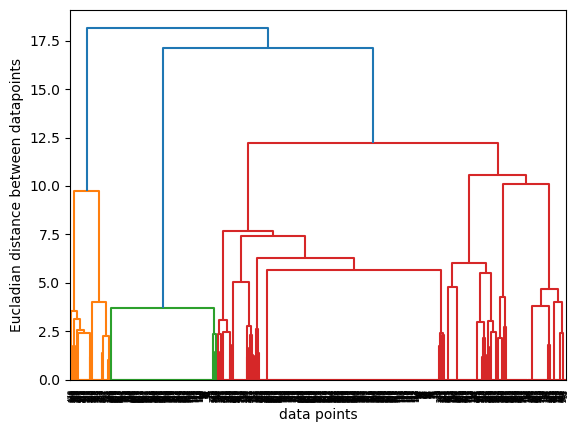

In [27]:
merge=linkage(data,method="ward")
dendrogram(merge,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("Eucladian distance between datapoints")
plt.show()


In [28]:
### Applying Agglomatarative clustering
from sklearn.cluster import AgglomerativeClustering

In [29]:
model=AgglomerativeClustering(n_clusters=6,linkage="ward")
data["clusters"]=model.fit_predict(data)

In [41]:
data["clusters"]

0      2
1      1
2      1
3      1
4      0
      ..
884    5
885    1
886    3
887    0
888    2
Name: clusters, Length: 889, dtype: int64

In [30]:
silhouette_score(data,data["clusters"])

0.6832654795236572

# scipy.cluster.Hirarchiecal and sklearn.cluster.Agglomarative cluster doesn't have wcss score and cluster_center_